In [1]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import os
import dlib
import cv2
import time
import math
import datetime
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import scipy.io
import bz2
from random import randint

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:

if not os.path.exists(os.path.abspath('.') + 'mmod_human_face_detector.dat.bz2'):
    annotation_zip = tf.keras.utils.get_file('mmod_human_face_detector.dat.bz2',
                            cache_subdir=os.path.abspath('.'),
                            origin = "http://dlib.net/files/mmod_human_face_detector.dat.bz2")
# Using pythons bz2 package to read the bz2 file in binary format and write it into a .dat file
with bz2.open("mmod_human_face_detector.dat.bz2", "rb") as f:
    content = f.read()

    with open("mmod_human_face_detector.dat", "wb") as weights_file:
        weights_file.write(content)

os.remove(annotation_zip)

694709/694709 [==============================] - 1s 1us/step


In [3]:
dataset_url = 'https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar'
annotation_folder = "wiki_crop"
if not os.path.exists(os.path.abspath('.') + annotation_folder):
    annotation_zip = tf.keras.utils.get_file('wiki.tar',
                                            cache_subdir=os.path.abspath('.'),
                                            origin = dataset_url,
                                            extract = True)
    os.remove(annotation_zip)
data_key = 'wiki'
mat_file = 'wiki.mat'

811315200/811315200 [==============================] - 11s 0us/step


In [4]:
dataset_url = 'https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar'
annotation_folder = "imdb_crop"
if not os.path.exists(os.path.abspath('.') + annotation_folder):
    annotation_zip = tf.keras.utils.get_file('imdb.tar',
                                            cache_subdir=os.path.abspath('.'),
                                            origin = dataset_url,
                                            extract = True)
    os.remove(annotation_zip)
data_key = 'imdb'
mat_file = 'imdb.mat'

7012157440/7012157440 [==============================] - 140s 0us/step


In [5]:
!python mat.py

time data '0-12-22' does not match format '%Y-%m-%d'
time data '0-05-21' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-

In [6]:
!python age.py

Выходные данные были обрезаны до нескольких последних строк (5000).
--(39916)Processing--
--(39917)Processing--
--(39918)Processing--
--(39919)Processing--
--(39920)Processing--
--(39921)Processing--
--(39922)Processing--
--(39923)Processing--
--(39924)Processing--
--(39925)Processing--
--(39926)Processing--
--(39927)Processing--
--(39928)Processing--
--(39929)Processing--
--(39930)Processing--
--(39931)Processing--
--(39932)Processing--
--(39933)Processing--
--(39934)Processing--
--(39935)Processing--
--(39936)Processing--
--(39937)Processing--
--(39938)Processing--
--(39939)Processing--
--(39940)Processing--
--(39941)Processing--
--(39942)Processing--
--(39943)Processing--
--(39944)Processing--
--(39945)Processing--
--(39946)Processing--
--(39947)Processing--
--(39948)Processing--
--(39949)Processing--
--(39950)Processing--
--(39951)Processing--
--(39952)Processing--
--(39953)Processing--
--(39954)Processing--
--(39955)Processing--
--(39956)Processing--
--(39957)Processing--
--(39958

In [ ]:
print("kek")

In [8]:
!zip -r /content/age.zip /content/dataset/age

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: content/dataset/age/train/14/158668.jpg (deflated 3%)
  adding: content/dataset/age/train/14/31999.jpg (deflated 2%)
  adding: content/dataset/age/train/14/164622.jpg (deflated 3%)
  adding: content/dataset/age/train/14/115774.jpg (deflated 3%)
  adding: content/dataset/age/train/14/20786.jpg (deflated 3%)
  adding: content/dataset/age/train/14/163476.jpg (deflated 3%)
  adding: content/dataset/age/train/14/136616.jpg (deflated 3%)
  adding: content/dataset/age/train/14/158565.jpg (deflated 2%)
  adding: content/dataset/age/train/14/104679.jpg (deflated 2%)
  adding: content/dataset/age/train/14/123927.jpg (deflated 2%)
  adding: content/dataset/age/train/14/155264.jpg (deflated 2%)
  adding: content/dataset/age/train/14/6055.jpg (deflated 3%)
  adding: content/dataset/age/train/14/77294.jpg (deflated 2%)
  adding: content/dataset/age/train/14/141548.jpg (deflated 3%)
  adding: content/dataset/age/train/14/17

In [9]:
from google.colab import files
files.download("/content/age.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Importing dependencies
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Setting up the data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/age/train', target_size=(128, 128), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('dataset/age/test', target_size=(128, 128), batch_size=32, class_mode='categorical')

# Building the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(102, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# # Freezing the base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# Compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy ', metrics=['mae'])

# Training the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Saving the model
model.save('age_model.h5')

Found 179660 images belonging to 102 classes.
Found 44916 images belonging to 102 classes.


Epoch 1/10
5615/5615 [==============================] - 1154s 197ms/step - loss: 0.0171 - mae: 0.0171 - val_loss: 0.0099 - val_mae: 0.0099
Epoch 2/10
5615/5615 [==============================] - 1121s 200ms/step - loss: 0.0099 - mae: 0.0099 - val_loss: 0.0098 - val_mae: 0.0098
Epoch 3/10
5615/5615 [==============================] - 1114s 198ms/step - loss: 0.0099 - mae: 0.0099 - val_loss: 0.0099 - val_mae: 0.0099
Epoch 4/10
3101/5615 [===============>..............] - ETA: 8:06 - loss: 0.0099 - mae: 0.0099

KeyboardInterrupt: ignored

In [13]:
model.save('age_model.h5')

Found 44916 images belonging to 102 classes.
1404/1404 [==============================] - 66s 46ms/step


<Axes: >

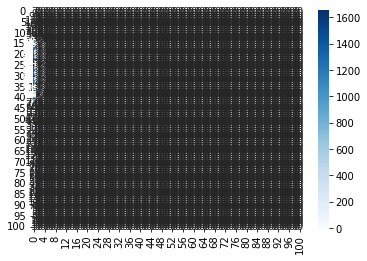

In [14]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('age_model.h5')

# Set up the test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('dataset/age/test', target_size=(128, 128), batch_size=32, class_mode='categorical')

# Get the predicted probabilities and class labels for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')


In [19]:
print(y_pred[44915])

[-8.069693e-05]


In [21]:
# Importing dependencies
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Setting up the data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/age/train', target_size=(128, 128), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('dataset/age/test', target_size=(128, 128), batch_size=32, class_mode='categorical')

# Building the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(102, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# # Freezing the base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# Compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['age_mae'])

# Training the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Saving the model
model.save('age_model_102.h5')

Found 179660 images belonging to 102 classes.
Found 44916 images belonging to 102 classes.


Epoch 1/10
5615/5615 [==============================] - 1301s 216ms/step - loss: 4.0606 - mae: 0.0192 - val_loss: 4.2387 - val_mae: 0.0193
Epoch 2/10
5615/5615 [==============================] - 1172s 209ms/step - loss: 4.0017 - mae: 0.0192 - val_loss: 3.9708 - val_mae: 0.0192
Epoch 3/10
5615/5615 [==============================] - 1176s 209ms/step - loss: 3.9820 - mae: 0.0192 - val_loss: 3.9652 - val_mae: 0.0192
Epoch 4/10
5615/5615 [==============================] - 1137s 202ms/step - loss: 3.9903 - mae: 0.0192 - val_loss: 3.9820 - val_mae: 0.0192
Epoch 5/10
5615/5615 [==============================] - 1172s 209ms/step - loss: 3.9816 - mae: 0.0192 - val_loss: 3.9753 - val_mae: 0.0192
Epoch 6/10
5490/5615 [============================>.] - ETA: 24s - loss: 3.9796 - mae: 0.0192

KeyboardInterrupt: ignored

In [ ]:
# Compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

In [22]:
from keras import backend as K


def age_mae(y_true, y_pred):
    true_age = K.sum(y_true * K.arange(0, 102, dtype="float32"), axis=-1)
    pred_age = K.sum(y_pred * K.arange(0, 102, dtype="float32"), axis=-1)
    mae = K.mean(K.abs(true_age - pred_age))
    return mae


In [27]:
# Importing dependencies
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Setting up the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/age/train', target_size=(128, 128), batch_size=64, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('dataset/age/test', target_size=(128, 128), batch_size=64, class_mode='categorical')

# Building the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3), pooling="avg")

prediction = Dense(units=102, kernel_initializer="he_normal", use_bias=False, activation="softmax",
                       name="pred_age")(base_model.output)

model = Model(inputs=base_model.input, outputs=prediction)
# # Freezing the base model layers
# for layer in base_model.layers:
#     layer.trainable = False


Found 179660 images belonging to 102 classes.
Found 44916 images belonging to 102 classes.


In [ ]:

# Compiling the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=[age_mae])

# Training the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator)

# Saving the model
model.save('age_model_102.h5')

Epoch 1/20
2808/2808 [==============================] - 733s 248ms/step - loss: 3.7472 - age_mae: 9.1518 - val_loss: 3.7186 - val_age_mae: 8.7461
Epoch 2/20
2265/2808 [=======================>......] - ETA: 2:03 - loss: 3.5875 - age_mae: 8.0677

In [ ]:
mat = scipy.io.loadmat(annotation_folder+'/'+mat_file)
data = mat[data_key]
route = data[0][0][2][0]
name = []
age = []
gender = []
images = []
total = 0
project_path = "drive/My Drive/Colab Notebooks/Tutorial/Gender Classifier"

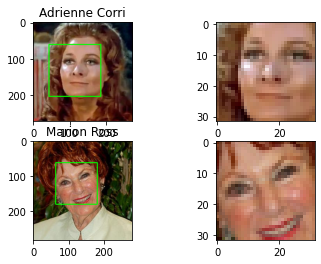

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
plt.figure()
i = 1

while(i <= 4):
    index = randint(0, len(route))
    if((math.isnan(data[0][0][6][0][index]) == False and data[0][0][6][0][index] > 0)):
        img = cv2.imread('wiki_crop/'+data[0][0][2][0][index][0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces_cnn = cnn_face_detector(img, 1)

        for face in faces_cnn:
            offset_x , offset_y  = max(faces_cnn[0].rect.left(),0),max(faces_cnn[0].rect.top(),0)
            target_width, target_height = faces_cnn[0].rect.right() - offset_x, faces_cnn[0].rect.bottom() - offset_y
            target_width = min(target_width, img.shape[1]-offset_x)
            target_height = min(target_height, img.shape[0]-offset_y)
            # draw box over face
            face_img = tf.image.crop_to_bounding_box(img, 
                                                    offset_y, offset_x, 
                                                    target_height,target_width)
            cv2.rectangle(img, (offset_x,offset_y), (offset_x+target_width,offset_y+target_height), (0,255,0), 2)
            face_img = tf.image.resize(face_img, (32, 32), method=tf.image.ResizeMethod.BICUBIC, antialias=True)
            face_img = tf.dtypes.cast(face_img, tf.int32)
            # Plotting images
            plt.subplot(2, 2, i)
            plt.imshow(img)
            plt.title(data[0][0][4][0][index][0])
            plt.subplot(2,2, i+1)
            plt.imshow(face_img)
            i += 2

In [ ]:
total = 0
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
today = datetime.date.today()
for i in range(0,len(route)):
    if i%100 is 0:
        print(i)
    try:
        if((math.isnan(data[0][0][6][0][i]) == False and data[0][0][6][0][i] > 0) and 
        math.isnan(data[0][0][3][0][i]) == False):
            img = cv2.imread(annotation_folder+"/"+route[i][0])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            faces_cnn = cnn_face_detector(img, 1)

            if len(faces_cnn) == 1:

                total += 1
                temp = datetime.date.fromordinal(int(data[0][0][0][0][i])) - datetime.timedelta(days = 366)
                offset_x , offset_y  = max(faces_cnn[0].rect.left(),0),max(faces_cnn[0].rect.top(),0)
                target_width, target_height = faces_cnn[0].rect.right() - offset_x, faces_cnn[0].rect.bottom() - offset_y

                target_width = min(target_width, img.shape[1]-offset_x)
                target_height = min(target_height, img.shape[0]-offset_y)

                face_img = tf.image.crop_to_bounding_box(img, 
                                                        offset_y, offset_x, 
                                                        target_height,target_width)
                
                face_img = tf.image.resize(face_img, (32, 32), method=tf.image.ResizeMethod.BICUBIC, antialias=True)
                face_img = tf.dtypes.cast(face_img, tf.int32)
                
                images.append(face_img.numpy())
                age.append([today.year - temp.year])
                name.append(data[0][0][4][0][i])
                gender.append([data[0][0][3][0][i]])

    except Exception as err:
        print(err)
        print("error in i value ", i)
        if (len(name) == total):
            name.pop()
        if (len(gender) == total):
            gender.pop()
        if (len(age) == total):
            age.pop()
        if (len(images) == total):
            images.pop()
        total -= 1
    
    except KeyboardInterrupt:
        break

print(total, " elements were processed and stored")

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-6-2c4671c380c1>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i%100 is 0:


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
project_path = ""

In [ ]:
meta_data = {
    "images" : images,
    "name" : name,
    # "dob" : dob,
    "age" : age,
    "gender" : gender
}
if not os.path.exists(project_path+"/dataset"):
    os.mkdir(project_path+"/dataset")
binary_file = open(project_path+"/dataset/wiki_data.pickle", "ab")
pickle.dump(meta_data, binary_file )
binary_file.close()

In [ ]:
print((meta_data['images'][0]))

[[[  9  83 138]
  [127 100 116]
  [210  23  33]
  ...
  [ 58  81 124]
  [ 68 108 165]
  [ 47  84 129]]

 [[  4  79 142]
  [101 112 136]
  [168  74  86]
  ...
  [ 98  86  93]
  [ 48  79 119]
  [ 60 109 160]]

 [[  0  78 145]
  [ 57 101 149]
  [167 113 109]
  ...
  [133 105  99]
  [ 67  75  96]
  [ 47  88 136]]

 ...

 [[147 106 110]
  [140  93  89]
  [146 108 101]
  ...
  [126  84  78]
  [ 96  80  90]
  [ 29  46  72]]

 [[176 143 148]
  [138  93  82]
  [131  83  75]
  ...
  [117  80  82]
  [ 65  62  87]
  [ 10  42  91]]

 [[197 177 187]
  [133  95  88]
  [136  85  72]
  ...
  [ 99  74  77]
  [ 31  46  81]
  [  4  45  96]]]


In [ ]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the dataset
with open('/dataset/wiki_data.pickle', 'rb') as f:
    data = pickle.load(f)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['images'], data['gender'], test_size=0.2, random_state=42)

# Preprocess the data
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)
# print(X_test.shape)
y_train = np.eye(2)[y_train.reshape(-1)]
y_test = np.eye(2)[y_test.reshape(-1)]

# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the weights of all layers except for the last few layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add a new fully connected layer to the model to predict the gender
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)

IndexError: ignored

In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Load the dataset
with open('/dataset/wiki_data.pickle', 'rb') as f:
    dataset = pickle.load(f)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['images'], dataset['gender'], test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = np.array(X_train) / 255.
X_test = np.array(X_test) / 255.

# One-hot encode the gender labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Define the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc)

80134624/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1057/1057 [==============================] - 45s 39ms/step - loss: 0.3271 - accuracy: 0.8692 - val_loss: 0.2410 - val_accuracy: 0.9124
Epoch 2/10
1057/1057 [==============================] - 39s 37ms/step - loss: 0.2318 - accuracy: 0.9142 - val_loss: 0.2101 - val_accuracy: 0.9201
Epoch 3/10
1057/1057 [==============================] - 40s 38ms/step - loss: 0.2016 - accuracy: 0.9280 - val_loss: 0.2239 - val_accuracy: 0.9237
Epoch 4/10
1057/1057 [==============================] - 39s 37ms/step - loss: 0.1747 - accuracy: 0.9381 - val_loss: 0.1886 - val_accuracy: 0.9285
Epoch 5/10
1057/1057 [==============================] - 39s 37ms/step - loss: 0.1506 - accuracy: 0.9491 - val_loss: 0.2046 - val_accuracy: 0.9253
Epoch 6/10
1057/1057 [==============================] - 39s 37ms/step - loss: 0.1266 - accuracy: 0.9592 - val_loss: 0.2308 - val_accuracy: 0.9204
Epoch 7/10
1057/1057 [==============================] - 39s 37ms/step - loss: 0.1082 - accuracy: 0.9662 - val_loss: 0.2300 -

265/265 [==============================] - 4s 12ms/step


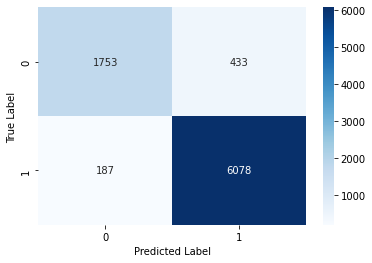

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Convert the predicted and actual labels to class numbers (0 or 1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Predict the gender and age of a new image
new_image = np.random.rand(1, 32, 32, 3)
gender_pred, age_pred = model.predict(new_image)
print(age_pred)
ages = np.arange(0, 101).reshape(101, 1)
predicted_ages =  age_pred.dot(ages).flatten()





print('Gender prediction:', gender_pred)
print('Age prediction:', predicted_ages)

1/1 [==============================] - 0s 127ms/step
[[0.00498619 0.01588076 0.00372877 0.00325422 0.01475993 0.02537878
  0.00953606 0.00459321 0.02337685 0.04345959 0.00284691 0.00478836
  0.01321666 0.00501954 0.00570181 0.0190752  0.01119451 0.00204594
  0.00950843 0.009856   0.01158519 0.00992938 0.01751969 0.01239786
  0.03491821 0.01079163 0.01124497 0.00307293 0.00493096 0.00586494
  0.01002976 0.00839146 0.01070909 0.01450985 0.00744516 0.00227272
  0.00712028 0.02540336 0.00913142 0.00513625 0.01645467 0.00546569
  0.0047096  0.00859089 0.00509415 0.00866228 0.00633077 0.01761745
  0.00996613 0.0051156  0.0056903  0.00878349 0.00795255 0.00782733
  0.00673418 0.00850103 0.00938244 0.00551064 0.01065679 0.00957794
  0.01589119 0.0024922  0.01019692 0.00771863 0.0041103  0.00280356
  0.00465046 0.00489809 0.00416301 0.0026504  0.0067406  0.0103747
  0.01579881 0.00895626 0.00456248 0.01731069 0.00488918 0.00348386
  0.00733855 0.03984694 0.0227471  0.01472959 0.01156576 0.00447

In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Concatenate
from keras.optimizers import Adam

# Load the dataset
with open('/dataset/wiki_data.pickle', 'rb') as f:
    dataset = pickle.load(f)

# Split the data into training and testing sets
X_train, X_test, y_train_gender, y_test_gender, y_train_age,  y_test_age = train_test_split(dataset['images'], dataset['gender'], dataset['age'], test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = np.array(X_train) / 255.
X_test = np.array(X_test) / 255.

# One-hot encode the gender labels
y_train_gender = to_categorical(y_train_gender, num_classes=2)
y_test_gender = to_categorical(y_test_gender, num_classes=2)

# Convert the age labels to floats
y_train_age = np.array(y_train_age, dtype=np.float32)
y_test_age = np.array(y_test_age, dtype=np.float32)

# Define the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)

# x = Dense(128, activation='relu')(x)

# Gender prediction output
gender_output = Dense(2, activation='softmax', name='gender_output')(x)

# Age prediction output
age_output = Dense(units = 101, activation='softmax', name='age_output')(x)

# Combine the two outputs into a single model
model = Model(inputs=base_model.input, outputs=[gender_output, age_output])

# Compile the model
model.compile(loss={'gender_output': 'binary_crossentropy', 'age_output': 'mse'}, optimizer=Adam(lr=0.0001), metrics={'gender_output': 'accuracy', 'age_output': 'mae'})

# Train the model
model.fit(X_train, {'gender_output': y_train_gender, 'age_output': y_train_age}, epochs=10, validation_data=(X_test, {'gender_output': y_test_gender, 'age_output': y_test_age}))

# Evaluate the model
loss, gender_loss, age_loss, gender_acc, age_mae = model.evaluate(X_test, {'gender_output': y_test_gender, 'age_output': y_test_age})
print('Test loss:', loss)
print('Gender test loss:', gender_loss)
print('Age test loss:', age_loss)
print('Gender test accuracy:', gender_acc)
print('Age test MAE:', age_mae)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
1057/1057 [==============================] - 42s 38ms/step - loss: 4432.6094 - gender_output_loss: 0.3489 - age_output_loss: 4432.2588 - gender_output_accuracy: 0.8570 - age_output_mae: 60.4768 - val_loss: 4373.4712 - val_gender_output_loss: 0.2561 - val_age_output_loss: 4373.2148 - val_gender_output_accuracy: 0.9122 - val_age_output_mae: 60.8561
Epoch 2/10
 567/1057 [===============>..............] - ETA: 17s - loss: 4338.7642 - gender_output_loss: 0.2364 - age_output_loss: 4338.5312 - gender_output_accuracy: 0.9103 - age_output_mae: 60.5767

KeyboardInterrupt: ignored

In [ ]:
def age_mae(y_true, y_pred):
    true_age = K.sum(y_true * K.arange(0, 101, dtype="float32"), axis=-1)
    pred_age = K.sum(y_pred * K.arange(0, 101, dtype="float32"), axis=-1)
    mae = K.mean(K.abs(true_age - pred_age))
    return mae

In [ ]:
new_image = np.random.rand(1, 32, 32, 3)
gender_pred, age_pred = model.predict(new_image)